Collect Images

In [15]:
def screen_capture():
  import pyscreenshot as ImageGrab
  import time

  #images_folder = "captured_image/12/"
  images_folder = "New_images/"
  for i in range(2):
    time.sleep(7)
    im = ImageGrab.grab(bbox = (60,170,400,550))   # co-ordinates for capturing image
    print("Saved..",i)
    im.save(images_folder+str(i)+'.png')
    print("Clear screen and redraw again...")
screen_capture()

Saved.. 0
Clear screen and redraw again...
Saved.. 1
Clear screen and redraw again...


2.Create Data with label

In [2]:
import numpy as np
def create_label(image_name):
    if image_name == '0':  #image_name = folder name
        return np.array([1,0,0,0,0,0,0,0,0,0,0,0])
    elif image_name == '1':
        return np.array([0,1,0,0,0,0,0,0,0,0,0,0])
    elif image_name == '2':
        return np.array([0,0,1,0,0,0,0,0,0,0,0,0])
    elif image_name == '3':
        return np.array([0,0,0,1,0,0,0,0,0,0,0,0])
    elif image_name == '4':
        return np.array([0,0,0,0,1,0,0,0,0,0,0,0])
    elif image_name == '5':
        return np.array([0,0,0,0,0,1,0,0,0,0,0,0])
    elif image_name == '6':
        return np.array([0,0,0,0,0,0,1,0,0,0,0,0])
    elif image_name == '7':
        return np.array([0,0,0,0,0,0,0,1,0,0,0,0])
    elif image_name == '8':
        return np.array([0,0,0,0,0,0,0,0,1,0,0,0])
    elif image_name == '9':
        return np.array([0,0,0,0,0,0,0,0,0,1,0,0])
    elif image_name == '10':
        return np.array([0,0,0,0,0,0,0,0,0,0,1,0])
    elif image_name == '11':
        return np.array([0,0,0,0,0,0,0,0,0,0,0,1])
    


In [3]:
import os
import cv2
from random import shuffle
from tqdm import tqdm  # displaying progress bar

def create_data():
    data=[]
    for folder in tqdm(os.listdir("captured_image")): #list folder
        for img in os.listdir("captured_image/"+folder): # list images in each folder
            path = os.path.join("captured_image",folder,img)
            img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)  #for reading image
            try:
                img_data = cv2.resize(img_data,(28,28))
            except cv2.error as e:
                continue
            data.append([np.array(img_data),create_label(folder)])
            
    shuffle(data)
    return data


In [4]:
data = create_data()

100%|██████████| 12/12 [00:02<00:00,  4.41it/s]


3. Divinding data into training and testing part

In [5]:
train = data[:90]
test = data[90:]
x_train = np.array([i[0] for i in train]).reshape(-1,28,28,1) # data stored , 1 for grayscale image , -1 for auto calculate images=70
y_train = np.array([i[1] for i in train]).reshape(-1,1) # label stored
y_train = np.reshape(y_train , (-1,12))
x_test = np.array([i[0] for i in test]).reshape(-1,28,28,1)    # -1 for images = 30
y_test = [i[1] for i in test]


4. Building the model

In [6]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression



Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


Steps for CNN 
1. Convolutional layers
2. Normalization
3. Pooling
4. fully connected

In [7]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
convnet = input_data(shape=[None,28,28,1],name='input') # type = <class 'tensorflow.python.framework.ops.Tensor'>

convnet = conv_2d(convnet,32,5,activation='relu') # no_filter =32 , filter_size=5
convnet = max_pool_2d(convnet,5) # kernel_size =5
convnet = conv_2d(convnet,64,5,activation='relu') 
convnet = max_pool_2d(convnet,3)
convnet = conv_2d(convnet,128,5,activation='relu') 
convnet = max_pool_2d(convnet,5)
#convnet = conv_2d(convnet,64,5,activation='relu') 
#convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,32,5,activation='relu') 
convnet = max_pool_2d(convnet,5)

convnet = fully_connected(convnet,1024,activation='relu')  #1024 = neurons as hidden layer
#convnet = dropout(convnet,0.3) # dropout for preventing  a model from overfitting
convnet = fully_connected(convnet,12,activation='softmax')  # 10= nurons as right now here the dataset has 10 digit 0 to 9 
                                                            # Softmax use for classification problem 
convnet = regression(convnet,optimizer='adam',learning_rate= 0.001,loss='categorical_crossentropy',name='targets')    # adam for optimizing the model
model = tflearn.DNN(convnet,tensorboard_verbose=1)  #DNN = Deep neural network
model.fit({'input':x_train},{'targets':y_train},n_epoch=40,validation_set=({'input':x_test},{'targets':y_test}),show_metric=True)


Training Step: 79  | total loss: 1.59835 | time: 0.143s
| Adam | epoch: 040 | loss: 1.59835 - acc: 0.7976 -- iter: 64/90
Training Step: 80  | total loss: 1.45236 | time: 1.282s
| Adam | epoch: 040 | loss: 1.45236 - acc: 0.8183 | val_loss: 1.11757 - val_acc: 0.6667 -- iter: 90/90
--


In [8]:
def create_test_data():
    data = []
    for img in tqdm(os.listdir("New_images/")):
        path = os.path.join("New_images",img)
        img_num = img.split('.')[0]    #[0] for image name is like 0.png
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try:
            img_data = cv2.resize(img_data,(28,28))
        except cv2.error as e:
            continue
        data.append([np.array(img_data),img_num])
        #print(np.array(img_data))
        #print(img_num)
    shuffle(data)
    return data
    

In [9]:
test_data = create_test_data()

100%|██████████| 12/12 [00:00<00:00, 29.89it/s]


Prediction: ૮


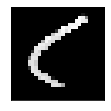

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[4:5]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ગ


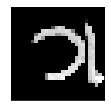

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[3:4]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    if result == 10:
        print("Prediction: ક")
    if result == 11:
        print("Prediction: ગ")
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૧


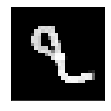

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[6:7]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૩


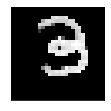

In [66]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[9:10]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૯


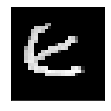

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[2:3]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૧


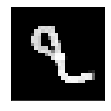

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[5:6]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: શે


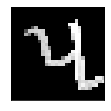

In [95]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[6:7]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૬


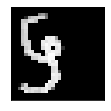

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[7:8]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૮


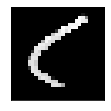

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[8:9]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૩


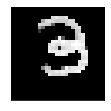

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[9:10]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Prediction: ૩


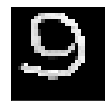

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[4:5]):
    img_data = data[0]  # 0 index there is image data in 1 index image number
    y = fig.add_subplot(5,5,num+1)
    orig = img_data
    data = img_data.reshape(28,28,1)
    model_out = model.predict([data])
    result = np.argmax(model_out)
    y.imshow(orig, cmap = 'gray')
    if result == 0:
        print("Prediction: ૦")
    if result == 1:
        result= "૧"
        print("Prediction: "+str(result))
    if result == 2:
        result ="૨"
        print("Prediction: "+str(result))
    if result == 3:
        result = "૩"
        print("Prediction: "+str(result))
    if result == 4:
        result = "૪"
        print("Prediction: "+str(result))
    if result == 5:
        result = "૫"
        print("Prediction: "+str(result))
    if result == 6:
        result = "૬"
        print("Prediction: "+str(result))
    if result == 7:
        result = "૭"
        print("Prediction: "+str(result))
    if result == 8:
        result = "૮"
        print("Prediction: "+str(result))
    if result == 9:
        result = "૯"
        print("Prediction: "+str(result))
    str_label = "Prediction: "+str(result)
    #y.imshow(orig, cmap = 'gray')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()